Using the python chess library we are trying to create an chess AI. 

In [1]:
import chess
import random

import time

from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
board = chess.Board()

Not every pieces have the same value

In [3]:
pieces_value_dict = {
    1: 1.0,
    2: 3.0,
    3: 3.0,
    4: 5.0,
    5: 9.0,
    6: 0.0,
}

Not every square have the same efficienty

In [4]:
squares_value_dict = {
}

for k in range(0, 64):
    if k in [27, 28, 35, 36]:
        squares_value_dict[k] = 1.5
    elif k in [18, 19, 20, 21, 26, 29, 34, 37, 42, 43, 44, 45]:
        squares_value_dict[k] = 1
    else: 
        squares_value_dict[k] = 0.75

Multiple score function which allow us to apprehend the situation of the board

In [5]:
def score_board_enemy_pieces(a_board, a_color):
    board_enemy_pieces = sum([
        pieces_value_dict.get(a_board.piece_map().get(i).piece_type) for i in list(a_board.piece_map()) if a_board.piece_map().get(i).color != a_color
    ])
    
    return board_enemy_pieces

def score_board_threat(a_board, a_color):
    board_threat = sum([
        pieces_value_dict.get(a_board.piece_map().get(i).piece_type) * len(list(a_board.attackers((a_color), i))) for i in list(a_board.piece_map()) if a_board.piece_map().get(i).color == (not a_color)
    ])
    
    return board_threat

def score_board_vulnerability(a_board, a_color):
    board_vulnerability = sum([
        pieces_value_dict.get(a_board.piece_map().get(i).piece_type) * len(list(a_board.attackers((not a_color), i))) for i in list(a_board.piece_map()) if a_board.piece_map().get(i).color == a_color
    ])
    
    return board_vulnerability

def score_board_position(a_board, a_color):
    board_position = sum([
        squares_value_dict.get(i) * pieces_value_dict.get(a_board.piece_map().get(i).piece_type) for i in list(a_board.piece_map()) if a_board.piece_map().get(i).color == a_color
    ])
    
    return board_position


Create a linear composition of the scores previously implemented

In [6]:
def score(a_board, a_color, pond):
    
    board_enemy_pieces = score_board_enemy_pieces(a_board, a_color)
    
    board_threat = score_board_threat(a_board, a_color)
    
    board_vulnerability = score_board_vulnerability(a_board, a_color)
    
    board_position = score_board_position(a_board, a_color)
    
    score = pond[0]*board_enemy_pieces + pond[1]*board_threat + pond[2]*board_vulnerability  + pond[3]*board_position
    
    return score if not board.is_fivefold_repetition() else -100

Find the move with the best score

In [7]:
def best_moves(a_board, moves, color, pond = [-1, .5, -.5, 1]):
    best_cand = moves[0]
    a_board.push(best_cand)
    best_score_cand = score(a_board, color, pond)
    a_board.pop()
    
    for move in moves: 
        a_board.push(move)
        if a_board.is_checkmate():
            a_board.pop()
            return move
        cand_score = score(a_board, color, pond)
        if cand_score > best_score_cand:
            best_cand = move
            best_score_cand = cand_score
            
        a_board.pop()
    
    return best_cand

Play a single game

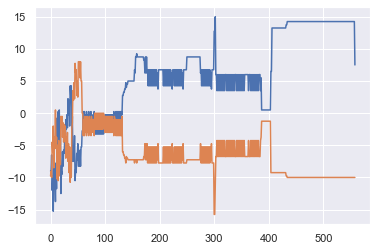

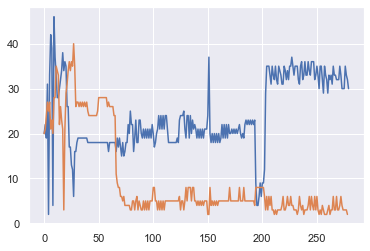

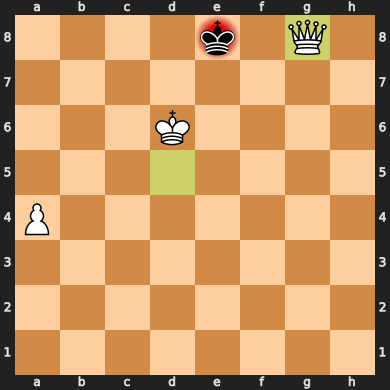

In [22]:
board = chess.Board()

white_scores = []
black_scores = []
white_number_of_moves = []
black_number_of_moves = []

pond_theta = [-1, .5, -.5, 1]

while not board.is_game_over():
    all_moves = list(board.legal_moves)
    random.shuffle(all_moves)
    
    if board.turn:
        white_number_of_moves.append(len(all_moves))
    else:
        black_number_of_moves.append(len(all_moves))
        
    
    move = best_moves(board, all_moves, board.turn, pond_theta)
    
    board.push(move)
    
    white_scores.append(score(board, chess.WHITE, pond_theta))
    black_scores.append(score(board, chess.BLACK, pond_theta))

plt.plot(white_scores)
plt.plot(black_scores)

plt.show()

plt.plot(white_number_of_moves)
plt.plot(black_number_of_moves)

plt.show()

display(board)

In [23]:
board.result()

'1-0'

Here we are trying to determine the best ponderation possible

In [13]:
white_pond = [-3, .5, -.5, 1]
black_pond = [-1, .5, -.5, 1]

res = []

for i in tqdm(range(50)):
    board = chess.Board()
    while not board.is_game_over():
        all_moves = list(board.legal_moves)
        random.shuffle(all_moves)
        
        move = best_moves(board, all_moves, board.turn, white_pond if board.turn == chess.WHITE else black_pond)
        
        board.push(move)
    res.append(board.result())

100%|██████████| 50/50 [07:40<00:00,  9.21s/it]


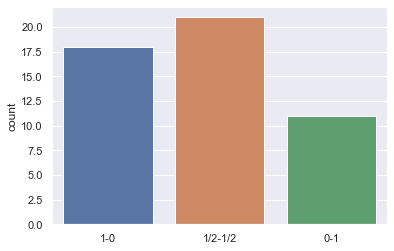

In [14]:
sns.countplot(
    res, 
    order = ['1-0', '1/2-1/2', '0-1']
)

We are also trying to assess the impact of the side playing (white has a advantage in chess since he is playing first)

In [15]:
black_pond = [-3, .5, -.5, 1]
white_pond = [-1, .5, -.5, 1]

res = []

for i in tqdm(range(50)):
    board = chess.Board()
    while not board.is_game_over():
        all_moves = list(board.legal_moves)
        random.shuffle(all_moves)
        
        move = best_moves(board, all_moves, board.turn, white_pond if board.turn == chess.WHITE else black_pond)
        
        board.push(move)
    res.append(board.result())

100%|██████████| 50/50 [07:45<00:00,  9.30s/it]


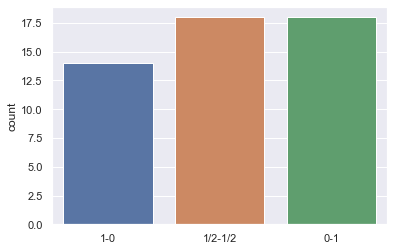

In [16]:
sns.countplot(
    res, 
    order = ['1-0', '1/2-1/2', '0-1']
)

The goal here would be to determine the best ponderation possible :
- Genetic algorithm
- Heuristic 
- Speed up the score computing